In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Mex.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==2]

In [6]:
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

C:\Users\lapep\AppData\Local\Temp\ipykernel_18328\2313346897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


In [7]:
df1=df1[df1['price'] <40000]

In [8]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [9]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
model.fit(X=X1, y=Y)

LinearRegression()

In [12]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(691.8872574724699)}

In [13]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([691.88725747, 691.88725747, 691.88725747, ..., 691.88725747,
       691.88725747, 691.88725747], shape=(5721,))

<Axes: xlabel='room_type', ylabel='price'>

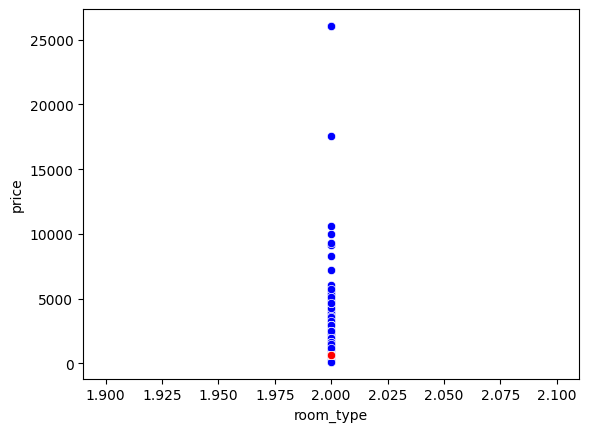

In [14]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [15]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [16]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [17]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [18]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [19]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [20]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [21]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.75544508]),
 'rank_': 1,
 'singular_': array([1833.91422502]),
 'intercept_': np.float64(538.39182685354)}

In [22]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [23]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([675.31654323, 713.93633503, 670.05020798, ..., 713.93633503,
       713.93633503, 713.93633503], shape=(5721,))

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

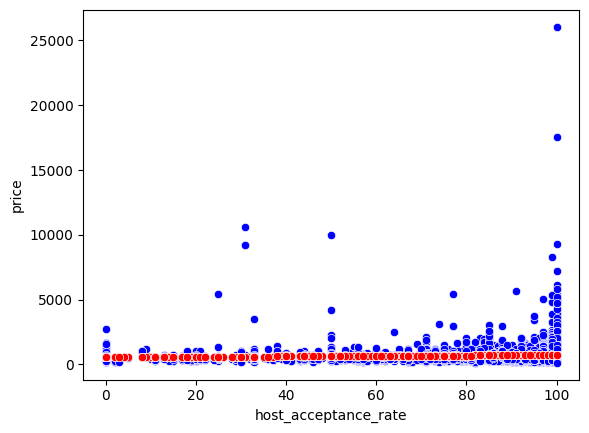

In [24]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [25]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.0028795867047227697

In [26]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.05366178067044337)

In [27]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_18328\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [28]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [29]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [30]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [31]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([716.59369369, 716.59369369, 676.22079406, ..., 676.22079406,
       676.22079406, 676.22079406], shape=(5721,))

<Axes: xlabel='host_is_superhost', ylabel='price'>

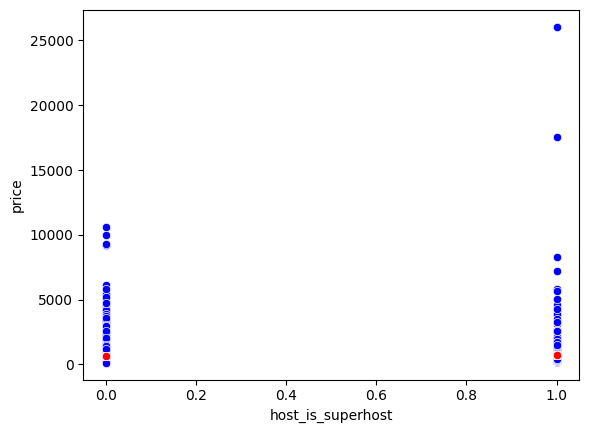

In [32]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [33]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.0006152486202500862

In [34]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.024804205696818557)

In [35]:
df1['bathrooms'] = df1['bathrooms'].round().astype(int)

In [36]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [37]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [38]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [39]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([1.89177107, 2.00999396, 1.89177107, ..., 1.89177107, 1.89177107,
       1.89177107], shape=(5721,))

<Axes: xlabel='bathrooms', ylabel='accommodates'>

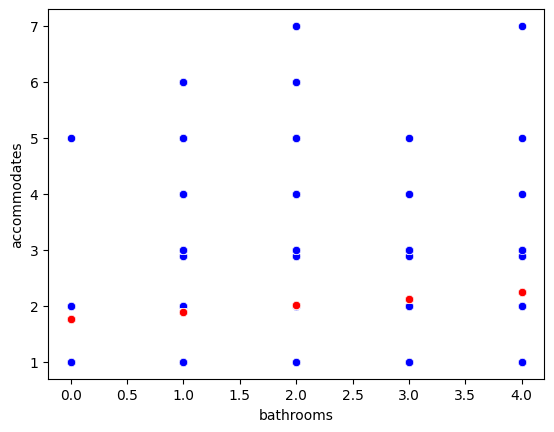

In [40]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [41]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.0052067357319677265

In [42]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.07215771429284416)

In [43]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [44]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [45]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [46]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [47]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([675.36605129, 719.22582881, 726.29998648, ..., 730.54448108,
       589.06132778, 730.54448108], shape=(5721,))

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

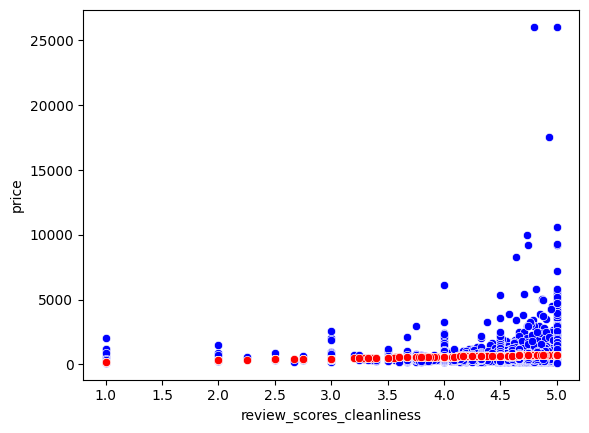

In [48]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [49]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.0054188166625454

In [50]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.07361261211603214)

In [51]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_18328\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [52]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [53]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [54]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [55]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([691.71832479, 691.71832479, 691.71832479, ..., 691.71832479,
       691.71832479, 691.71832479], shape=(5721,))

<Axes: xlabel='host_identity_verified', ylabel='price'>

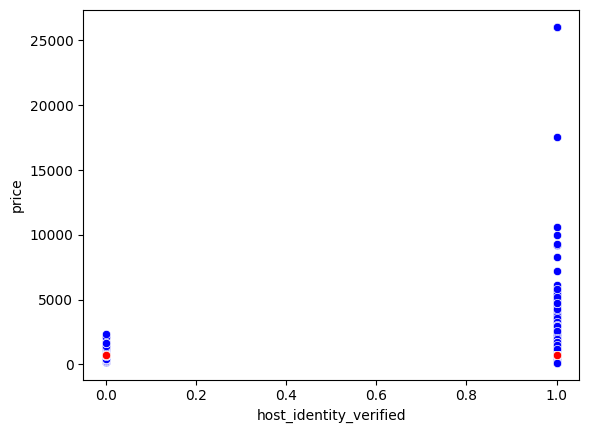

In [56]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [57]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

4.14042500984646e-06

In [58]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.0020348034327291814)

In [59]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_18328\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [60]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [61]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [62]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [63]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([620.40027894, 620.40027894, 620.40027894, ..., 811.86891386,
       811.86891386, 811.86891386], shape=(5721,))

<Axes: xlabel='instant_bookable', ylabel='price'>

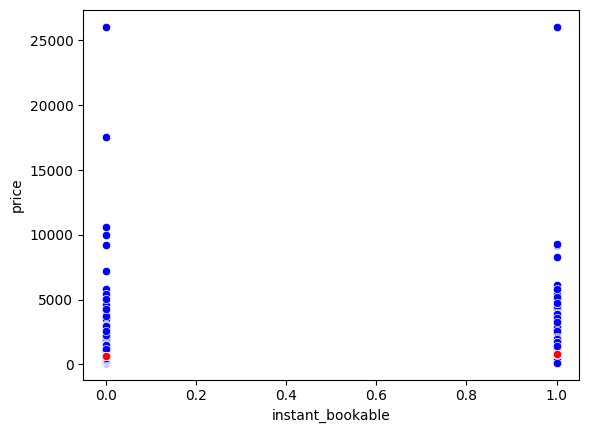

In [64]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [65]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.01363362578294558

In [66]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.11676311824778225)

In [67]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Entire bungalow':22,
    'Earthen home':23,
    'Entire hostel':24,
    'Entire in-law':25,
    'Holiday park':26,
    'Campsite':27,
    'Castle':28,
    'Hut':29,
    'Entire home/apt':30,
    'Shipping container':31,
    'Dome':32,
    'Tent':33,
    'Tower':34,
    'Private room in rental unit':35,
    'Private room in home':36,
    'Private room in guest suite':37,
    'Private room in serviced apartment':38,
    'Private room in townhouse':39,
    'Private room in bed and breakfast':40,
    'Private room in condo':41,
    'Private room in tiny home':42,
    'Private room in loft':43,
    'Room in boutique hotel':44,
    'Private room in villa':45,
    'Private room in casa particular':46,
    'Private room in guesthouse':47,
    'Private room':48,
    'Private room in farm stay':49,
    'Private room in cabin':50,
    'Room in hotel':51,
    'Private room in hostel':52,
    'Private room in dorm':53,
    'Private room in dome':54,
    'Private room in barn':55,
    'Private room in hut':56,
    'Private room in vacation home':57,
    'Private room in shipping container':58,
    'Private room in tower':59,
    'Private room in cottage':60,
    'Private room in nature lodge':61,
    'Private room in minsu':62
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_18328\732123360.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [68]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [69]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [70]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [71]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([636.98838428, 652.98983392, 668.99128356, ..., 893.01157854,
       893.01157854, 636.98838428], shape=(5721,))

<Axes: xlabel='property_type', ylabel='price'>

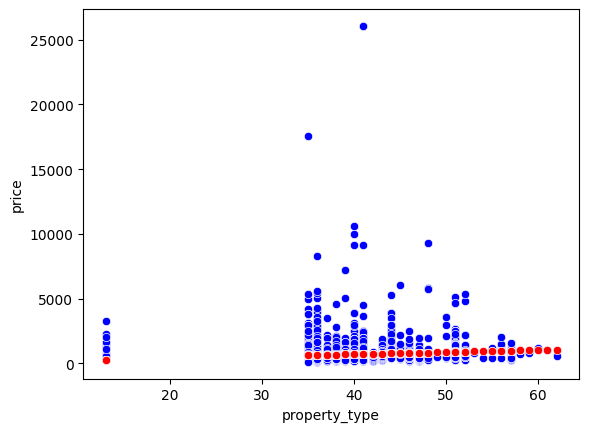

In [72]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [73]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.010274872185646933

In [74]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.10136504419989631)

In [75]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [77]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [78]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [79]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 0.00000000e+00,  1.56179303e+02,  8.74232264e-03,
         -3.63565519e+01,  2.17624877e+01,  1.81856022e+02,
          1.37306072e+01]]),
 'rank_': 6,
 'singular_': array([1834.4346337 ,  377.88588448,   38.38429429,   32.77544417,
          29.12252809,    7.8167703 ,    0.        ]),
 'intercept_': array([-615.16047701])}

In [80]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.1182229]]),
 'rank_': 1,
 'singular_': array([37.55545919]),
 'intercept_': array([1.77354817])}

In [81]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[ 571.48520144],
       [ 633.82372379],
       [ 633.38225046],
       ...,
       [1012.3707109 ],
       [ 856.19140762],
       [ 792.68099508]], shape=(5721, 1))

In [82]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [83]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
7,571.485201,335.0,2,4.61,78.0,1,1,0,2.0,1,35
10,633.823724,384.0,2,4.92,100.0,1,1,0,1.0,2,36
12,633.382250,1200.0,2,4.97,75.0,1,0,0,2.0,1,37
13,604.370278,526.0,2,4.82,88.0,1,1,0,1.0,1,35
15,586.969933,750.0,2,4.62,100.0,1,1,0,2.0,2,36
...,...,...,...,...,...,...,...,...,...,...,...
26439,693.208617,1200.0,2,5.00,100.0,1,0,0,2.0,1,41
26456,1012.370711,462.0,2,5.00,100.0,1,0,1,3.0,1,51
26460,1012.370711,464.0,2,5.00,100.0,1,0,1,3.0,1,51
26462,856.191408,462.0,2,4.00,100.0,1,0,1,3.0,1,51


In [84]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[1.89177107],
       [2.00999396],
       [1.89177107],
       ...,
       [1.89177107],
       [1.89177107],
       [1.89177107]], shape=(5721, 1))

In [85]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
7,571.485201,1.891771,335.0,2,4.61,78.0,1,1,0,2.0,1,35
10,633.823724,2.009994,384.0,2,4.92,100.0,1,1,0,1.0,2,36
12,633.382250,1.891771,1200.0,2,4.97,75.0,1,0,0,2.0,1,37
13,604.370278,1.891771,526.0,2,4.82,88.0,1,1,0,1.0,1,35
15,586.969933,2.009994,750.0,2,4.62,100.0,1,1,0,2.0,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...
26439,693.208617,1.891771,1200.0,2,5.00,100.0,1,0,0,2.0,1,41
26456,1012.370711,1.891771,462.0,2,5.00,100.0,1,0,1,3.0,1,51
26460,1012.370711,1.891771,464.0,2,5.00,100.0,1,0,1,3.0,1,51
26462,856.191408,1.891771,462.0,2,4.00,100.0,1,0,1,3.0,1,51


In [86]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.028103190122944044

In [87]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.1676400612113466)

In [88]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.0052067357319677265

In [89]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.07215771429284416)

In [90]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [91]:
df1= df1.drop(['room_type'], axis=1)

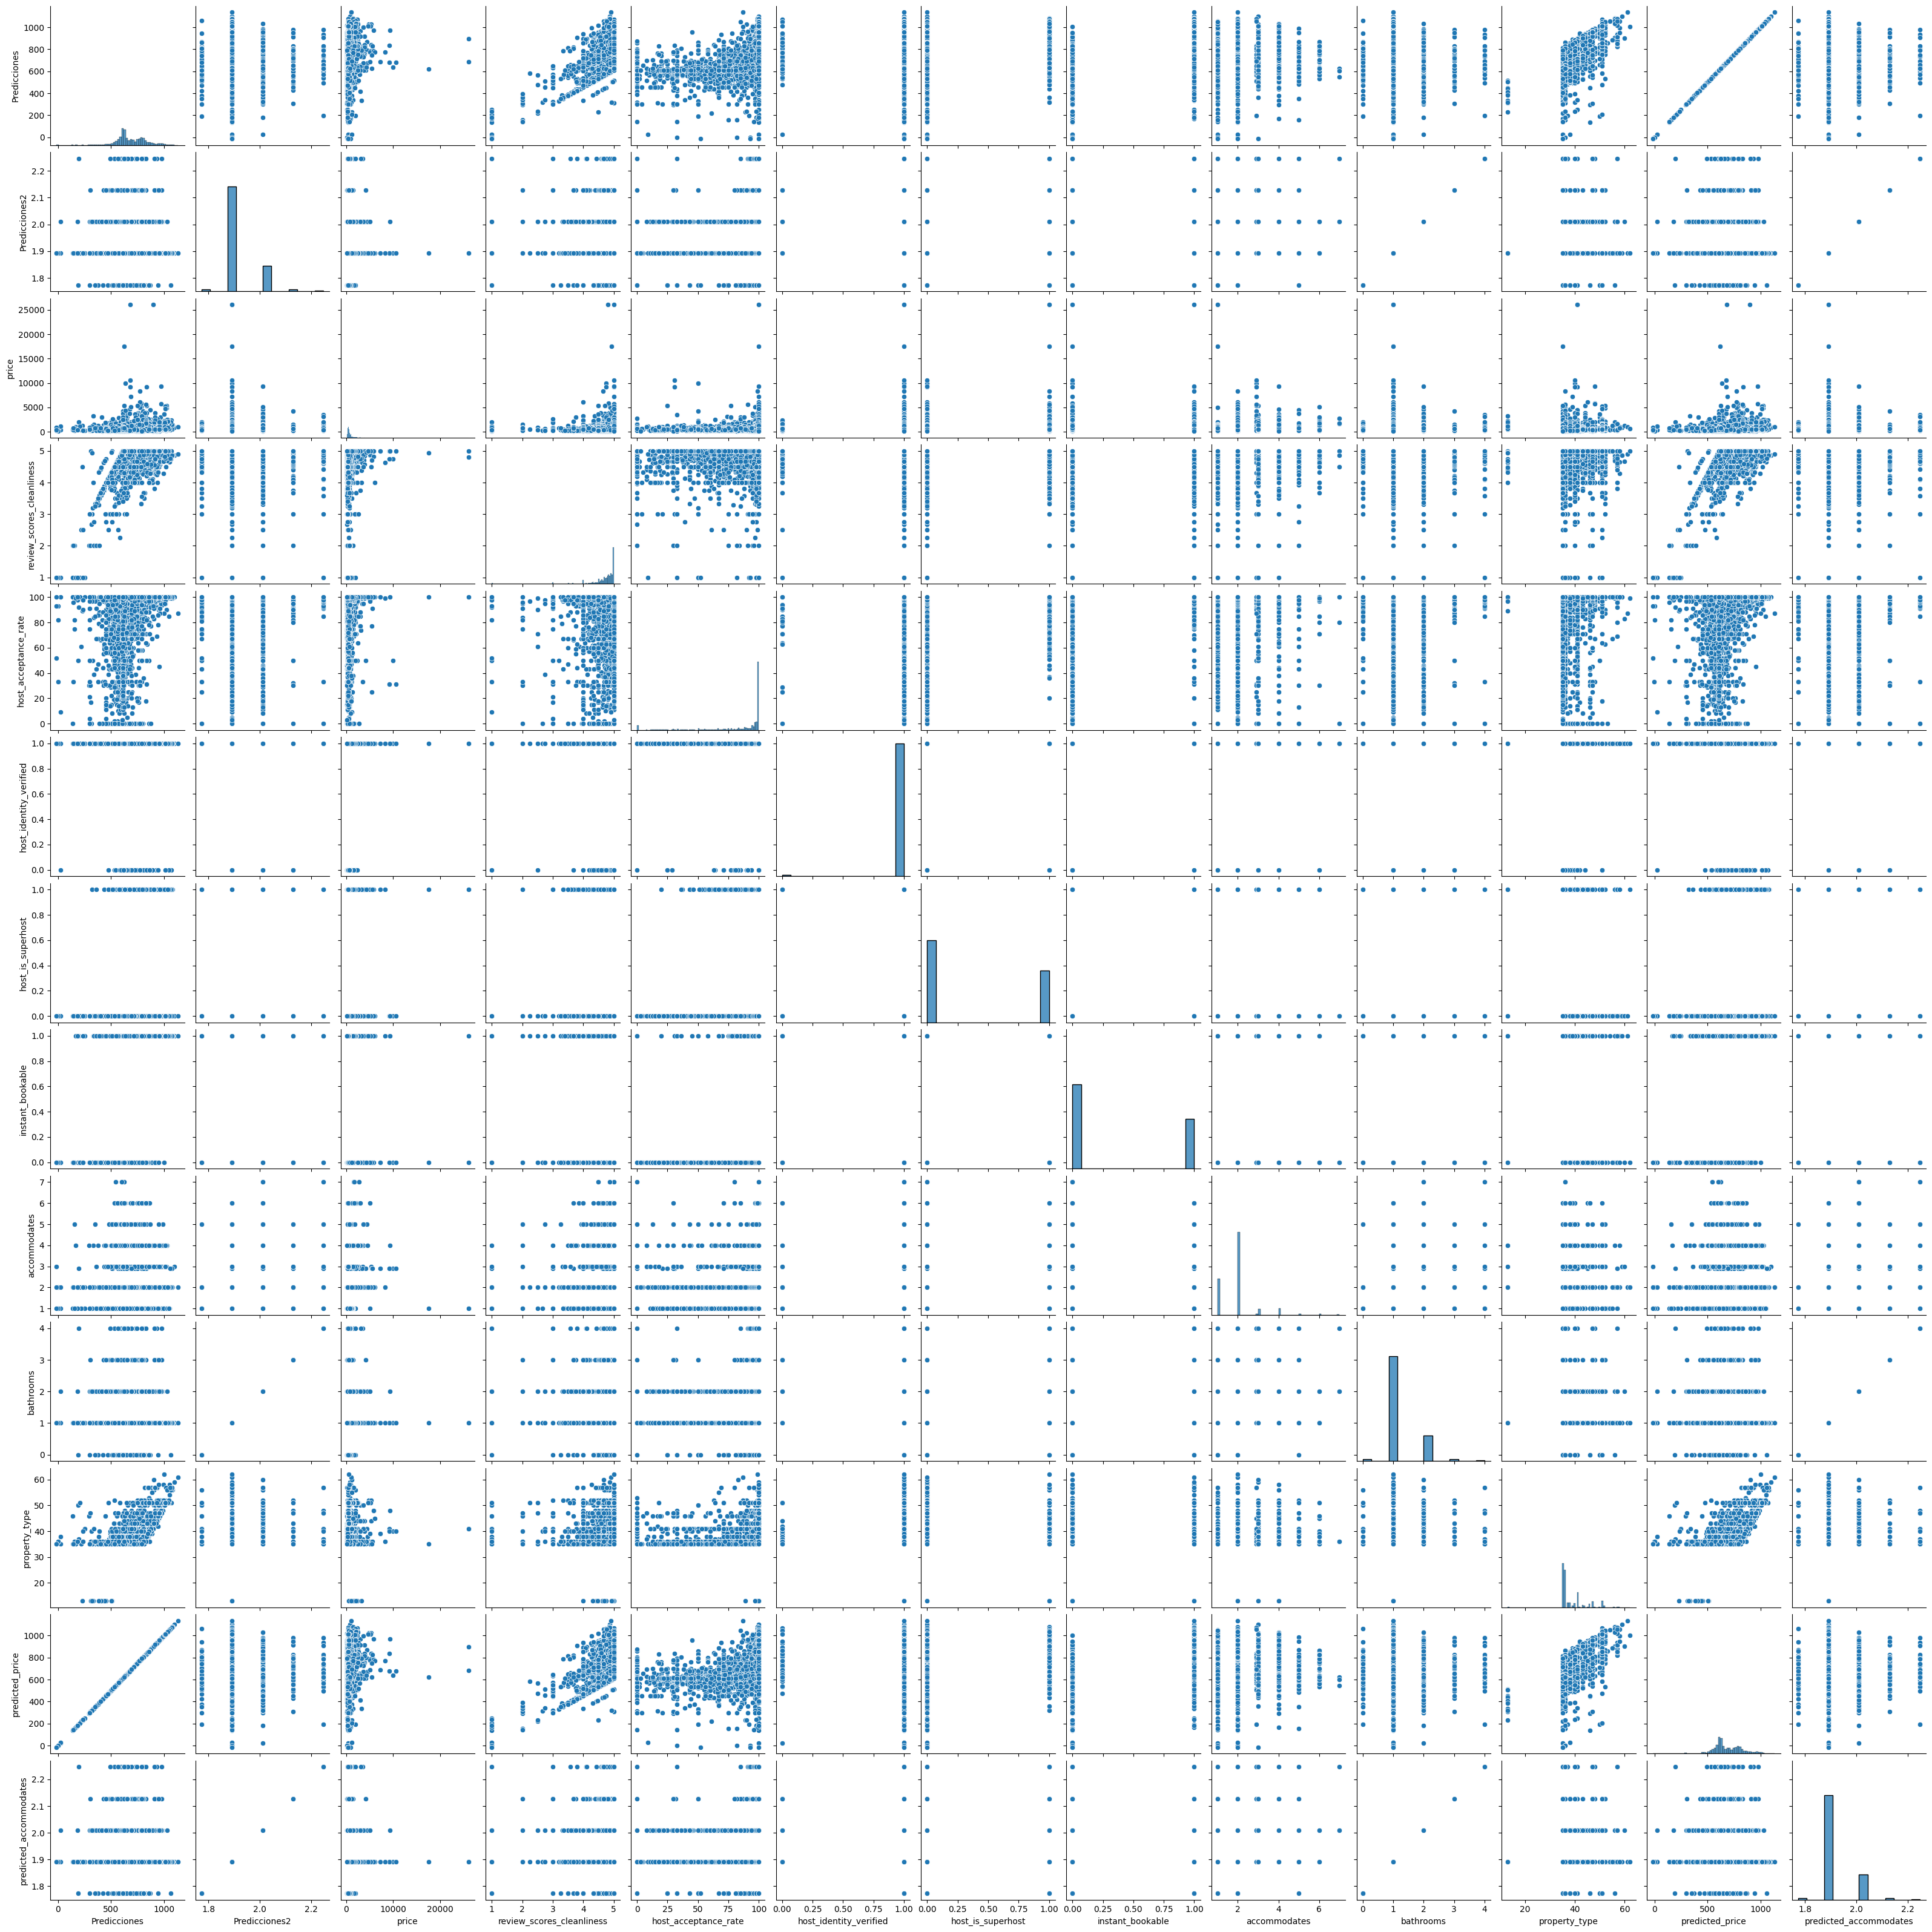

In [92]:
sns.pairplot(df1)

In [93]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,-0.052484,0.167640,0.439111,0.320101,-0.012138,0.147961,0.696511,0.130607,-0.052484,0.604659,1.000000,-0.052484
Predicciones2,-0.052484,1.000000,-0.019811,-0.034605,-0.022837,-0.046554,-0.017712,-0.012728,0.072158,1.000000,-0.052346,-0.052484,1.000000
price,0.167640,-0.019811,1.000000,0.073613,0.053662,-0.002035,0.024804,0.116763,0.201610,-0.019811,0.101365,0.167640,-0.019811
review_scores_cleanliness,0.439111,-0.034605,0.073613,1.000000,0.040860,0.015668,0.205179,-0.079558,-0.021707,-0.034605,-0.017281,0.439111,-0.034605
host_acceptance_rate,0.320101,-0.022837,0.053662,0.040860,1.000000,0.003987,0.271026,0.336852,0.094364,-0.022837,0.104762,0.320101,-0.022837
host_identity_verified,-0.012138,-0.046554,-0.002035,0.015668,0.003987,1.000000,0.038312,0.028440,-0.000284,-0.046554,-0.025632,-0.012138,-0.046554
host_is_superhost,0.147961,-0.017712,0.024804,0.205179,0.271026,0.038312,1.000000,-0.019179,-0.019254,-0.017712,-0.034519,0.147961,-0.017712
instant_bookable,0.696511,-0.012728,0.116763,-0.079558,0.336852,0.028440,-0.019179,1.000000,0.138008,-0.012728,0.145186,0.696511,-0.012728
accommodates,0.130607,0.072158,0.201610,-0.021707,0.094364,-0.000284,-0.019254,0.138008,1.000000,0.072158,0.098696,0.130607,0.072158
bathrooms,-0.052484,1.000000,-0.019811,-0.034605,-0.022837,-0.046554,-0.017712,-0.012728,0.072158,1.000000,-0.052346,-0.052484,1.000000


In [94]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.052484,0.167640,0.439111,0.320101,0.012138,0.147961,0.696511,0.130607,0.052484,0.604659,1.000000,0.052484
Predicciones2,0.052484,1.000000,0.019811,0.034605,0.022837,0.046554,0.017712,0.012728,0.072158,1.000000,0.052346,0.052484,1.000000
price,0.167640,0.019811,1.000000,0.073613,0.053662,0.002035,0.024804,0.116763,0.201610,0.019811,0.101365,0.167640,0.019811
review_scores_cleanliness,0.439111,0.034605,0.073613,1.000000,0.040860,0.015668,0.205179,0.079558,0.021707,0.034605,0.017281,0.439111,0.034605
host_acceptance_rate,0.320101,0.022837,0.053662,0.040860,1.000000,0.003987,0.271026,0.336852,0.094364,0.022837,0.104762,0.320101,0.022837
host_identity_verified,0.012138,0.046554,0.002035,0.015668,0.003987,1.000000,0.038312,0.028440,0.000284,0.046554,0.025632,0.012138,0.046554
host_is_superhost,0.147961,0.017712,0.024804,0.205179,0.271026,0.038312,1.000000,0.019179,0.019254,0.017712,0.034519,0.147961,0.017712
instant_bookable,0.696511,0.012728,0.116763,0.079558,0.336852,0.028440,0.019179,1.000000,0.138008,0.012728,0.145186,0.696511,0.012728
accommodates,0.130607,0.072158,0.201610,0.021707,0.094364,0.000284,0.019254,0.138008,1.000000,0.072158,0.098696,0.130607,0.072158
bathrooms,0.052484,1.000000,0.019811,0.034605,0.022837,0.046554,0.017712,0.012728,0.072158,1.000000,0.052346,0.052484,1.000000


<Axes: >

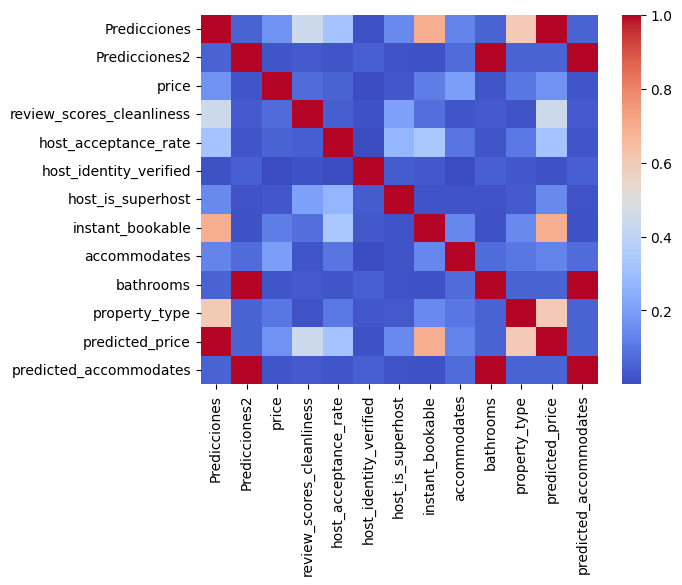

In [95]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

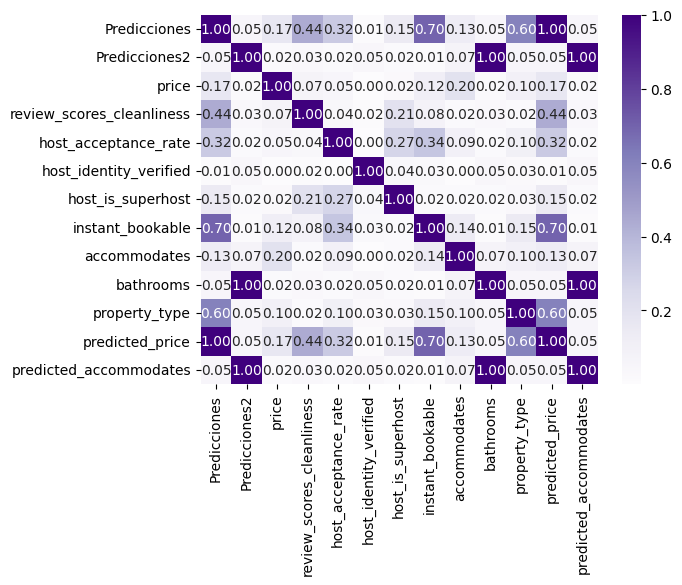

In [96]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [97]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,-0.052484,0.167640,0.439111,0.320101,-0.012138,0.147961,0.696511,0.130607,-0.052484,0.604659,1.000000,-0.052484
Predicciones2,-0.052484,1.000000,-0.019811,-0.034605,-0.022837,-0.046554,-0.017712,-0.012728,0.072158,1.000000,-0.052346,-0.052484,1.000000
price,0.167640,-0.019811,1.000000,0.073613,0.053662,-0.002035,0.024804,0.116763,0.201610,-0.019811,0.101365,0.167640,-0.019811
review_scores_cleanliness,0.439111,-0.034605,0.073613,1.000000,0.040860,0.015668,0.205179,-0.079558,-0.021707,-0.034605,-0.017281,0.439111,-0.034605
host_acceptance_rate,0.320101,-0.022837,0.053662,0.040860,1.000000,0.003987,0.271026,0.336852,0.094364,-0.022837,0.104762,0.320101,-0.022837
host_identity_verified,-0.012138,-0.046554,-0.002035,0.015668,0.003987,1.000000,0.038312,0.028440,-0.000284,-0.046554,-0.025632,-0.012138,-0.046554
host_is_superhost,0.147961,-0.017712,0.024804,0.205179,0.271026,0.038312,1.000000,-0.019179,-0.019254,-0.017712,-0.034519,0.147961,-0.017712
instant_bookable,0.696511,-0.012728,0.116763,-0.079558,0.336852,0.028440,-0.019179,1.000000,0.138008,-0.012728,0.145186,0.696511,-0.012728
accommodates,0.130607,0.072158,0.201610,-0.021707,0.094364,-0.000284,-0.019254,0.138008,1.000000,0.072158,0.098696,0.130607,0.072158
bathrooms,-0.052484,1.000000,-0.019811,-0.034605,-0.022837,-0.046554,-0.017712,-0.012728,0.072158,1.000000,-0.052346,-0.052484,1.000000


In [98]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.052484,0.167640,0.439111,0.320101,0.012138,0.147961,0.696511,0.130607,0.052484,0.604659,1.000000,0.052484
Predicciones2,0.052484,1.000000,0.019811,0.034605,0.022837,0.046554,0.017712,0.012728,0.072158,1.000000,0.052346,0.052484,1.000000
price,0.167640,0.019811,1.000000,0.073613,0.053662,0.002035,0.024804,0.116763,0.201610,0.019811,0.101365,0.167640,0.019811
review_scores_cleanliness,0.439111,0.034605,0.073613,1.000000,0.040860,0.015668,0.205179,0.079558,0.021707,0.034605,0.017281,0.439111,0.034605
host_acceptance_rate,0.320101,0.022837,0.053662,0.040860,1.000000,0.003987,0.271026,0.336852,0.094364,0.022837,0.104762,0.320101,0.022837
host_identity_verified,0.012138,0.046554,0.002035,0.015668,0.003987,1.000000,0.038312,0.028440,0.000284,0.046554,0.025632,0.012138,0.046554
host_is_superhost,0.147961,0.017712,0.024804,0.205179,0.271026,0.038312,1.000000,0.019179,0.019254,0.017712,0.034519,0.147961,0.017712
instant_bookable,0.696511,0.012728,0.116763,0.079558,0.336852,0.028440,0.019179,1.000000,0.138008,0.012728,0.145186,0.696511,0.012728
accommodates,0.130607,0.072158,0.201610,0.021707,0.094364,0.000284,0.019254,0.138008,1.000000,0.072158,0.098696,0.130607,0.072158
bathrooms,0.052484,1.000000,0.019811,0.034605,0.022837,0.046554,0.017712,0.012728,0.072158,1.000000,0.052346,0.052484,1.000000


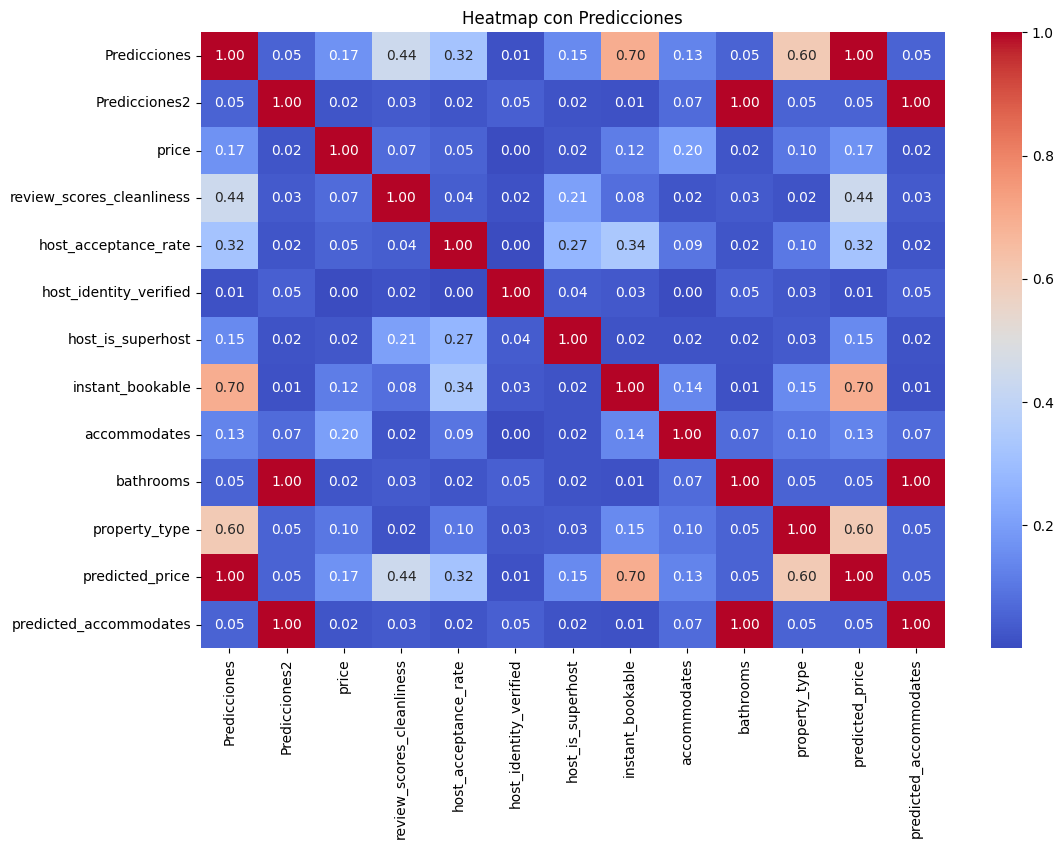

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()